In [30]:
import numpy as np
from matplotlib import pyplot as plt
import json
import matplotlib
%matplotlib inline

with open(('./spot_videos/controller_log.json')) as f:
    data = json.load(f)
    
dp = len(data["1"]['raibert_action_commanded'])
ls = len(data)



In [31]:
data['1'].keys()

dict_keys(['target_speed', 'target_speed_ang', 'input_current_speed', 'input_joint_pos', 'input_current_yaw_rate', 'latent_action', 'input_base_ori_euler', 'raibert_action_commanded', 'raibert_action_measured', 'raibert_base_velocity', 'raibert_base_ang_velocity', 'raibert_base_ori_euler', 'raibert_base_ori_quat', 'raibert_base_velocity_finite', 'raibert_base_ang_velocity_finite'])

In [32]:
print(np.array(data[str(1)]['raibert_base_velocity']).shape)
num_pts = len(data.keys())
vels = np.zeros((num_pts*100, 3))
ang_vels = np.copy(vels)
target_vel = np.copy(vels)
ang_vels_fin = np.copy(vels)
vels_fin = np.copy(vels)
ori = np.copy(vels)

for i in range(num_pts):
    vels[i*100:(i+1)*100,:] = np.array(data[str(i+1)]['raibert_base_velocity'])
    cur_target_vel = np.array(data[str(i+1)]['target_speed'])
    target_vel[i*100:(i+1)*100,0:2] = np.array(data[str(i+1)]['target_speed'])
    ang_vels[i*100:(i+1)*100,:]  = np.array(data[str(i+1)]['raibert_base_velocity'])
    vels_fin[i*100:(i+1)*100,0:3] = np.array(data[str(i+1)]['raibert_base_velocity_finite'])
    ori[i*100:(i+1)*100,0:3] = np.array(data[str(i+1)]['raibert_base_ori_euler'])


(100, 3)


In [33]:

vels

array([[ 5.55741557e-04,  5.25502054e-05, -7.93487724e-02],
       [ 1.01918472e-03, -1.13983416e-05, -1.58308259e-01],
       [ 1.41790847e-03, -6.85976317e-05, -2.37172317e-01],
       ...,
       [ 5.13034134e-02, -2.90365901e-02,  1.24500044e-01],
       [ 4.92133080e-02, -3.52156596e-02,  1.34955890e-01],
       [ 4.44915954e-02, -4.75081854e-02,  1.47479254e-01]])

Text(0.5, 1.0, 'X-Velocity')

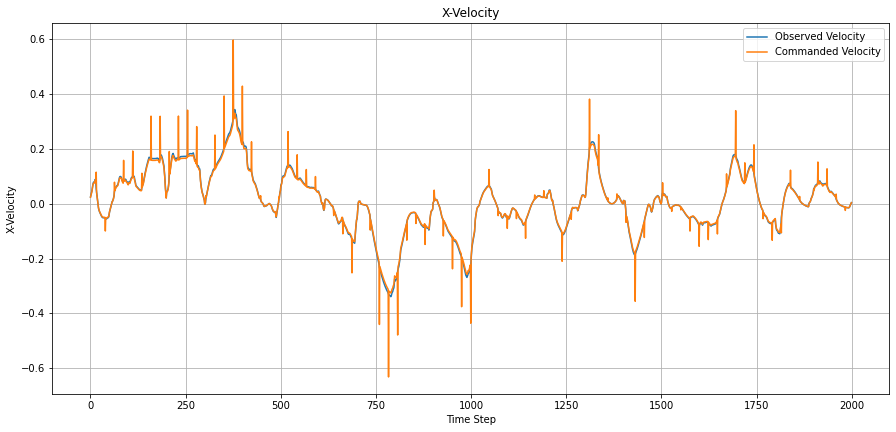

In [35]:
matplotlib.rcParams['figure.figsize'] = [15, 15]

plt.subplot(2,1,1)
idx = np.arange(8000,10000)
plt.plot(vels[idx, 0])
plt.plot(vels_fin[idx,  0])
plt.legend(['Observed Velocity', 'Commanded Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('X-Velocity')
plt.title('X-Velocity')


Text(0.5, 1.0, 'Y-Velocity')

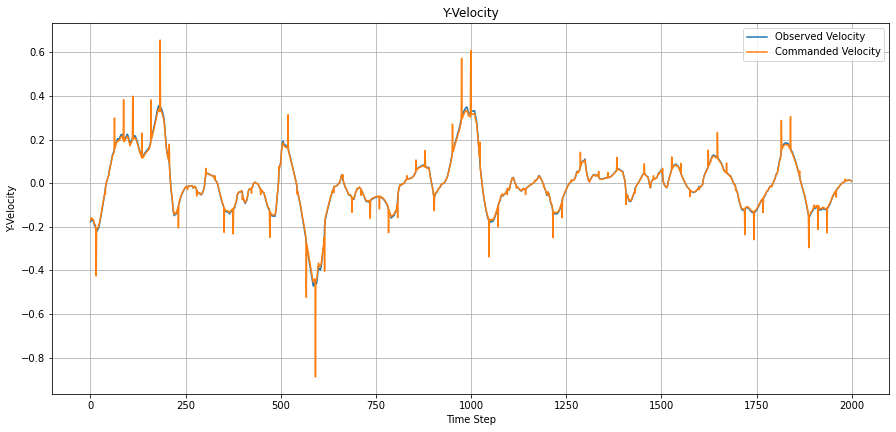

In [36]:
matplotlib.rcParams['figure.figsize'] = [15, 15]

plt.subplot(2,1,1)

plt.plot(vels[idx, 1])
plt.plot(vels_fin[idx,  1])
plt.legend(['Observed Velocity', 'Commanded Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Y-Velocity')
plt.title('Y-Velocity')

Text(0.5, 1.0, 'Orientation')

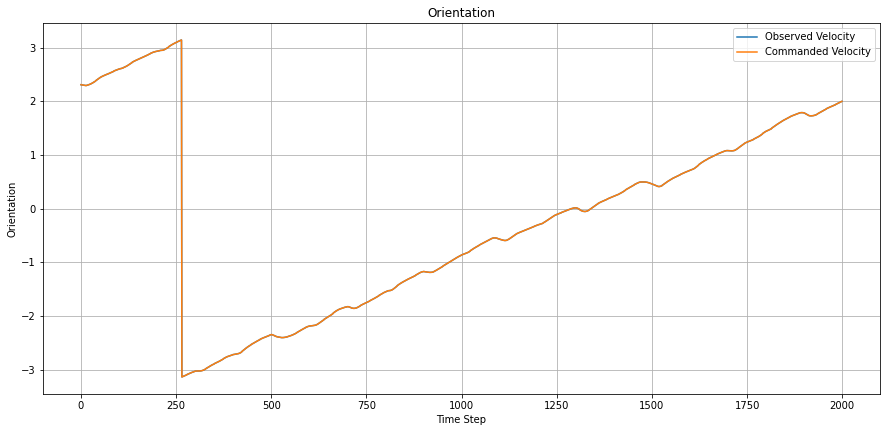

In [37]:
matplotlib.rcParams['figure.figsize'] = [15, 15]

plt.subplot(2,1,1)

plt.plot(ori[idx, 2])
plt.plot(ori[idx,  2])
plt.legend(['Observed Velocity', 'Commanded Velocity'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Orientation')
plt.title('Orientation')